# **1. Introduction & Motivation**



##1.1 Introduction

With the rapid development of e-commerce, the number of
pictures of clothing and fashion products on the Internet has
increased exponentially. Online shopping platforms need
to quickly and accurately identify product categories through
pictures to achieve automatic labeling, intelligent
recommendations, inventory management, and personalized
marketing. Accurate classification of fashion items can
help consumers shorten their search time, improve their
shopping experience, and promote conversion rates.
Due to the diversity of design, fashion product images are
highly complex and contain a large number of variants.
Traditional methods are difficult to accurately identify. Deep
Learning, especially CNNs, has demonstrated excellent
performance in the field of image recognition and provided a
solution for complex visual feature extraction. Research
on Fashion Item Classification can explore and promote the
application of deep learning in scenarios such as fine-grained
classification, feature extraction, and multi-label recognition.
Specifically, the study of fashion item classification can
explore and promote the application of deep learning in
scenarios such as fine-grained classification, feature
extraction, and multi-label recognition. Based on this
background, the use of deep learning for fashion product
image classification has attracted increasing attention from
academia and industry. This not only helps promote the
application of artificial intelligence(AI) in actual business
scenarios, but also provides theoretical and technical support
for building smarter and more efficient recommendation and
image search systems.

## 1.2 Motivation
### 1.2.1 Business Motivation
*   With the rapid development of **e-commerce**, the number of pictures of clothing and fashion products on the Internet has increased exponentially.
*   Online shopping platforms need to quickly and accurately identify **product categories** through pictures to achieve automatic labeling, intelligent recommendations, inventory management and personalized marketing.
*   Accurate classification of fashion items can help **consumers** shorten their search time, improve their shopping experience and promote conversion rates.

### 1.2.2 Technical Motivation
*  Due to the diversity of design, fashion product images are highly complex and contain a large number of variants. Traditional methods are difficult to accurately identify.
*   Deep Learning, especially **CNNs**, has demonstrated excellent performance in the field of image recognition and provided a solution for complex visual feature extraction.List item
*   Research on Fashion Item Classification can explore and promote the application of deep learning in scenarios such as **fine-grained** classification, feature extraction, and multi-label recognition.


## 1.3 Purpose of the project

This paper explores the potential of the mainstream CNN architecture in fashion item classification and continuously optimizes the classification ability of the model through finetuning. Specifically, this paper is divided into three studies and one pilot study. In the pilot study, we discussed and
selected appropriate data augmentation methods and epochs, which will be used in the next three studies. In study 1, the methods of reducing or increasing convolutional layers and modifying classifiers were compared. In study 2, Channel and Spatial Attention (CBAM) was introduced into AlexNet and compared. Based on the conclusions of study 1 and 2, study 3 introduced a deeper ResNet architecture than AlexNet and combined it with CBAM to test whether it would have better performance. All in all, this paper provides an excellent model and iterative methodology for fashion item classification through three progressive studies.


# **2. Related Works**

## 2.1 FashionNet and DeepFashion
*   WLiu et al. (2016) established the large-scale fashion dataset **DeepFashion**, containing over 800,000 clothing images with 50 fine-grained categories. They proposed **FashionNet**, a model based on **VGG-16**, which improved feature extraction by predicting clothing landmarks to adapt to deformation, occlusion, and varying camera angles. [link text](https://openaccess.thecvf.com/content_cvpr_2016/html/Liu_DeepFashion_Powering_Robust_CVPR_2016_paper.html)

## 2.2 Weakly Annotated Fashion Image
*  Corbière et al. (2017) employed **ResNet-50** as the backbone CNN, initialized with ImageNet pre-trained weights for feature extraction. They utilized weakly annotated text-image pairs to address labeling challenges in e-commerce scenarios. [link text](https://openaccess.thecvf.com/content_ICCV_2017_workshops/w32/html/Corbiere_Leveraging_Weakly_Annotated_ICCV_2017_paper.html)

## 2.3 A100
*  Zou et al. (2022 ) introduced A100, the first systematic framework to evaluate the aesthetic ability of fashion compatibility models, including **LAT** (Liberalism Aesthetic Test) and **AAT** (Academicism Aesthetic Test). This study offers cross-domain insights for clothing classification tasks, particularly in feature engineering and domain knowledge integration. [link text](https://openaccess.thecvf.com/content/CVPR2022/html/Zou_How_Good_Is_Aesthetic_Ability_of_a_Fashion_Model_CVPR_2022_paper.html)

## 2.4 Other works
*  Reviewing the latest research, most works adopt the standard CNN architecture, usually using transfer learning from ImageNet pre-trained backbone networks (such as ResNet, EfficientNet, DenseNet and VGG) to improve the performance of fashion category datasets [link text](https://doi.org/10.3390/info15040196), [link text](https://ieeexplore.ieee.org/abstract/document/10020122), [link text](https://ieeexplore.ieee.org/abstract/document/9390852), [link text](https://ieeexplore.ieee.org/abstract/document/9418371). Moreover, most studies focus on the Fashion-MNIST dataset, but a few studies extend their evaluation to more complex and diverse datasets, such as Street-FashionData[link text](https://ieeexplore.ieee.org/abstract/document/9390852), [link text](https://ieeexplore.ieee.org/abstract/document/9659256). As more and more niche brands use diversified channels such as independent websites for sales, lightweight fashion classification models are equally important. Based on this situation, this paper uses the dataset of Zou et al. (2022) for manual annotation to carry out the following research [link text](https://github.com/AemikaChow/AiDLab-fAshIon-Data/blob/main/Datasets/A100.md).

##**2.5 Data Sources**

Our dataset comes from Zou et al. (2022 ) introduced A100, the first systematic framework to evaluate the aesthetic ability of fashion compatibility models, including LAT (Liberalism Aesthetic Test) and AAT (Academicism Aesthetic Test). [link text](https://openaccess.thecvf.com/content/CVPR2022/html/Zou_How_Good_Is_Aesthetic_Ability_of_a_Fashion_Model_CVPR_2022_paper.html)

Because the task in the literature paper is the Fashion Matching problem. This is his dataset structure:

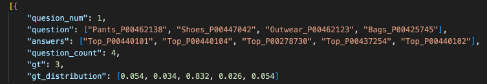

It is not suitable for our image classification task. So, we manually annotated the data. The following label data is formed:

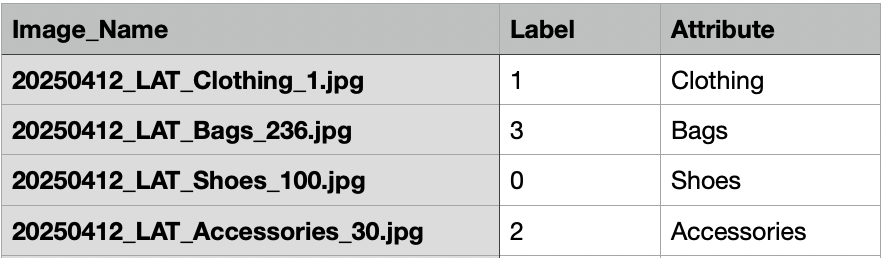

# **3. Exploratory Analysis of Data or RL Tasks**

After getting the labelled new dataset, we analysed the dataset in detail.

## 3.1 Properties of the Data

### 3.1.1 Duplicates or Anomalies






Duplicates or Anomalies are not detected.



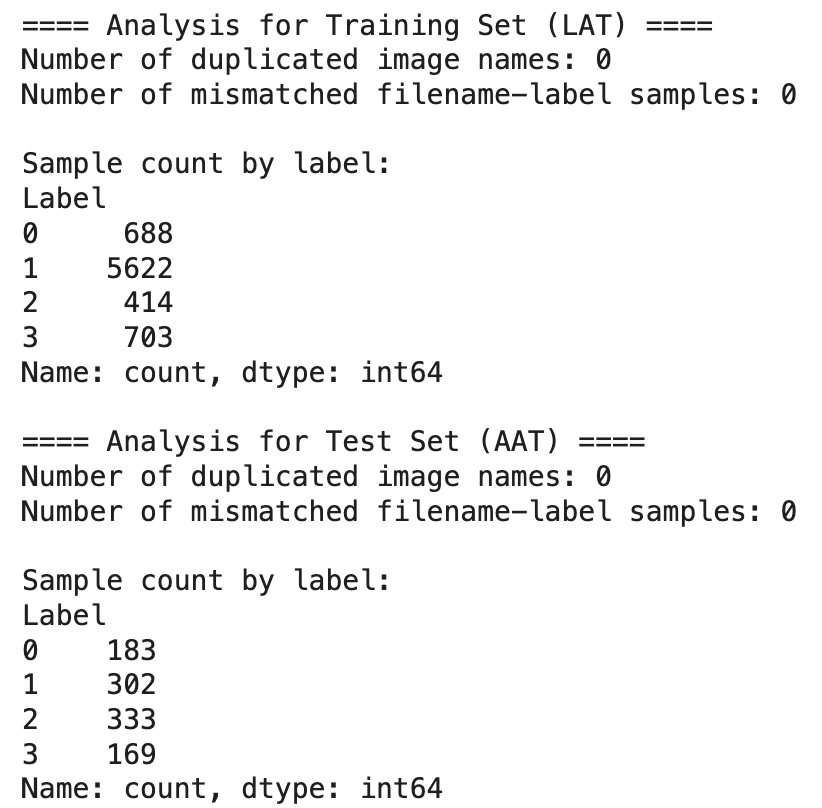



- **Number of Classes:** 4 (Shoes, Clothing, Accessories, Bags)
- **Class Distribution in the training set:**
  - Shoe[0]: 688
  - Clothing[1]: 5622
  - Accessories[2]: 414
  - Bags[3]: 703






### 3.1.2 Image Size Consistency Analysis

Image width is 960 pixels; Image height is 1080 pixels; There are no significant outliers, indicating that the image sizes are very uniform. So, the datasets can be used directly for training without additional resize.

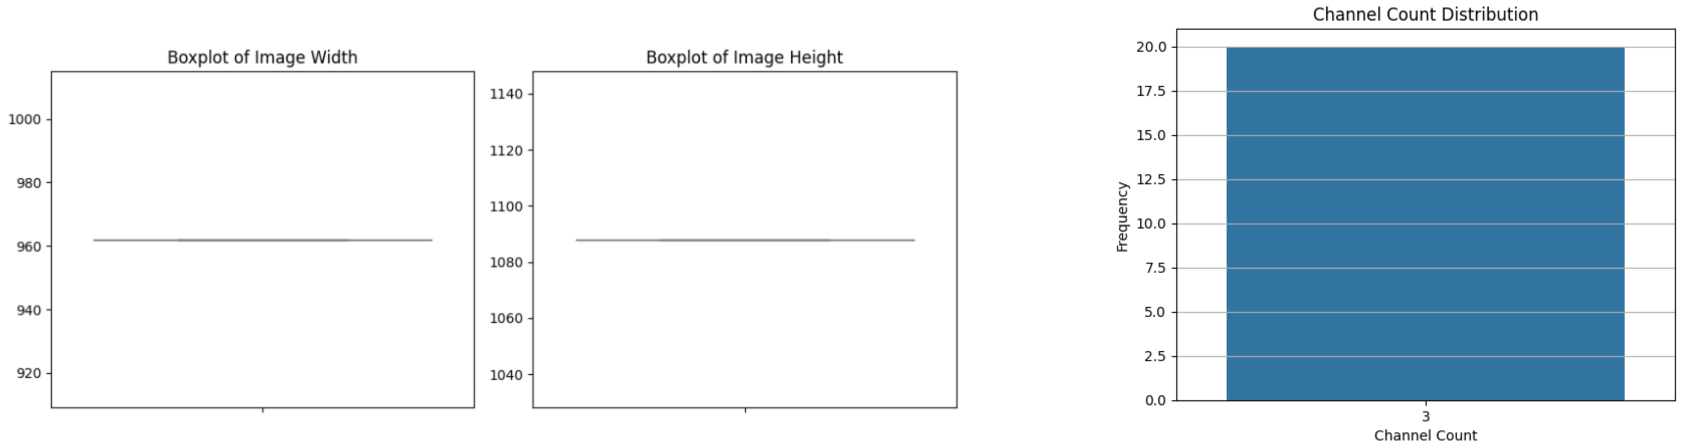

### 3.1.4 Brightness analysis or RGB Channel analysis

Most of the images are bright (mean values between 180 and 250), but there are also significantly darker images (e.g., image 15, which is only about 135 bright).

Differences in image 15 in image brightness mainly come from the contrast between the background color and the garment color (e.g. white background, white Clothing).

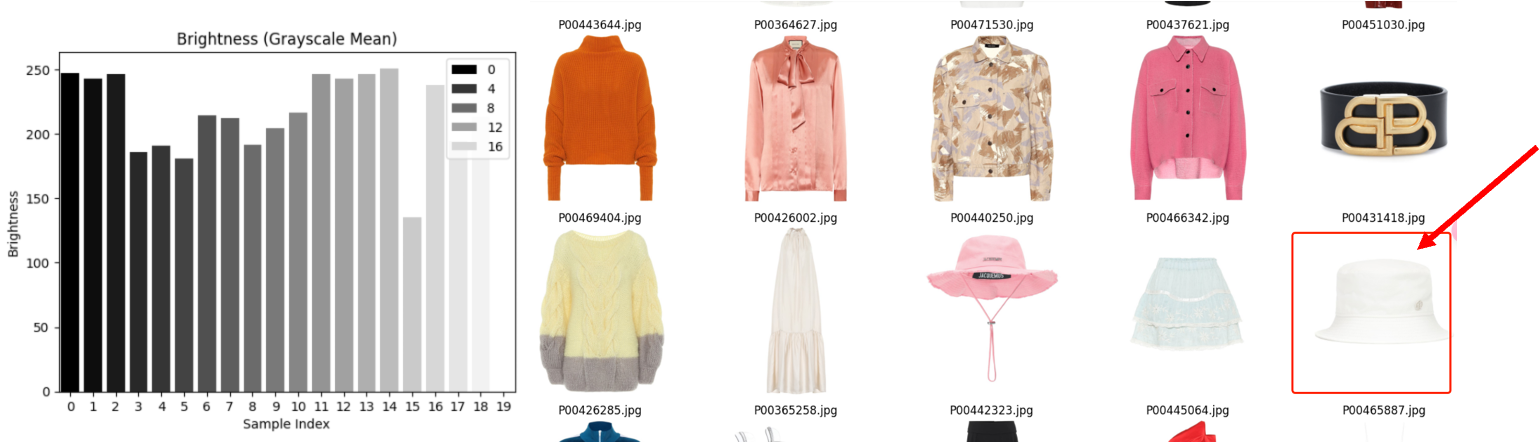

The overall trend of the three RGB channels is basically the same, but in some of the samples, Image 15, R/G/B values have dropped significantly, indicating that the image is overall darker or is hard to catch image.

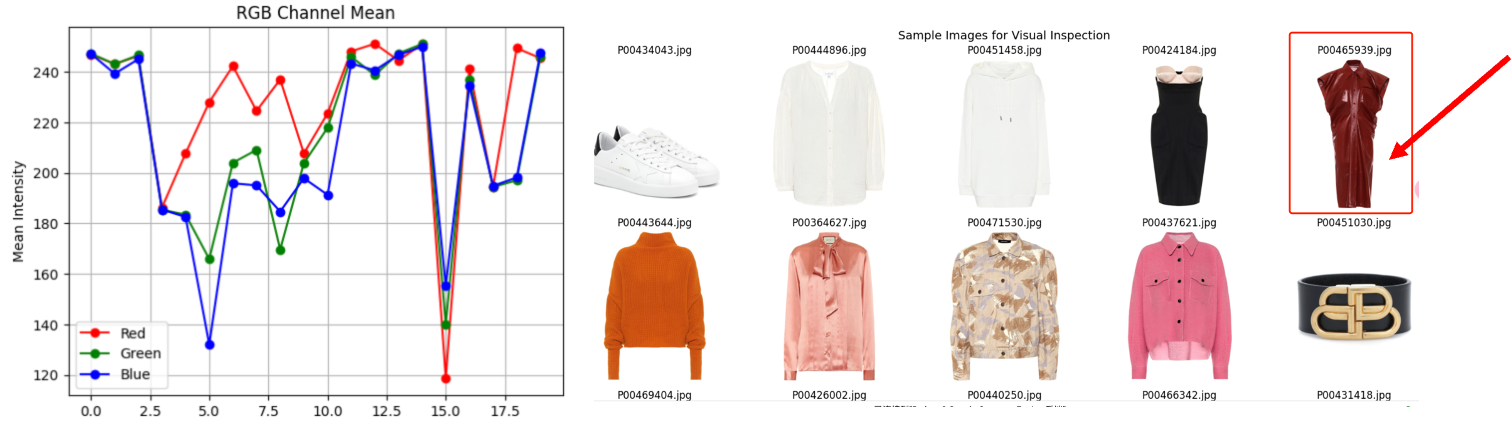

### 3.1.3 Channel Number Distribution Analysis

The number of images with channel number 3. It shows that these images are standard RGB images without grey scale or alpha channel anomaly maps.

By analysing the colours of the dataset above, we found that not only did the colours not help the classification favourably, they even had a negative impact.

Considering grey images not only eliminates the interference of colour but also reduces the computational cost. **We processed the graphs uniformly as grey scale graphs.**

## 3.2 Pre-processing Steps
1. **Grayscale Conversion**:
   - Converts images to a single-channel format.
   - Reduces complexity and is computationally efficient.

2. **Resizing**:
   - Resizes all images to 224x224 to match AlexNet requirements.

3. **Normalization**:
   - Standardizes pixel values to accelerate convergence and balance feature distributions.

In [ ]:
# Basic data preprocessing (without data augmentation)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((224, 224)),  # Input size required by AlexNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalization of grayscale images
])

## 3.3 Challenge

A serious Imbalance:
Clothing accounted for 75.7% of the training set, while Accessories accounted for only 5.6%.


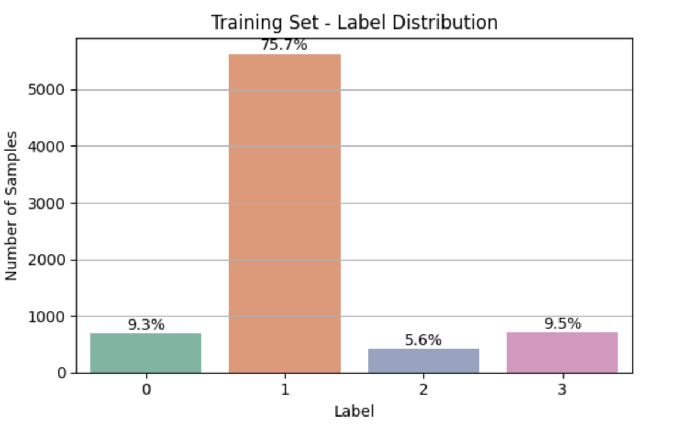

### 3.3.1 Solution
Weighted Sampling:
- **Purpose:** Address imbalance by increasing sampling frequency of minority class samples.
- **Method:** Computes a weight for each class and samples using Weighted Random Sampler to balance the data.
- **Effectiveness:** Ensures all classes are adequately represented during training.

In [ ]:
# Calculate sample weights for sampling
def create_sampler(dataset, class_counts):
    # Get labels for all samples
    targets = np.array([dataset.data_frame.iloc[i, 1] for i in range(len(dataset))])

    # Calculation of class weights
    class_weights = 1.0 / np.array(class_counts)
    class_weights = class_weights / np.sum(class_weights) * len(class_weights)

    # Assigning weights to each sample
    sample_weights = class_weights[targets]

    # Creating a weighted sampler
    sampler = WeightedRandomSampler(
        weights=sample_weights,
        num_samples=len(sample_weights),
        replacement=True
    )
    return sampler

#**4. Models**

# **4.1 AlexNet**

## 4.1.1 Introduction

AlexNet is a landmark convolutional neural network (CNN) developed by Alex Krizhevsky and colleagues in 2012. It gained fame by winning the ImageNet competition with a top-5 error rate of just 15%, far outperforming traditional methods.

The architecture consists of five convolutional layers and three fully connected layers. It takes an input image of size 224×224×3 and gradually extracts hierarchical features using filters of various sizes, followed by ReLU activation, max pooling, and dropout for regularization.

Key innovations include the use of ReLU to speed up training, dropout to prevent overfitting, and GPU acceleration to handle large datasets efficiently. These ideas made deep learning practical for real-world computer vision tasks.

## 4.1.2 Reasons of choosing 19 epoch
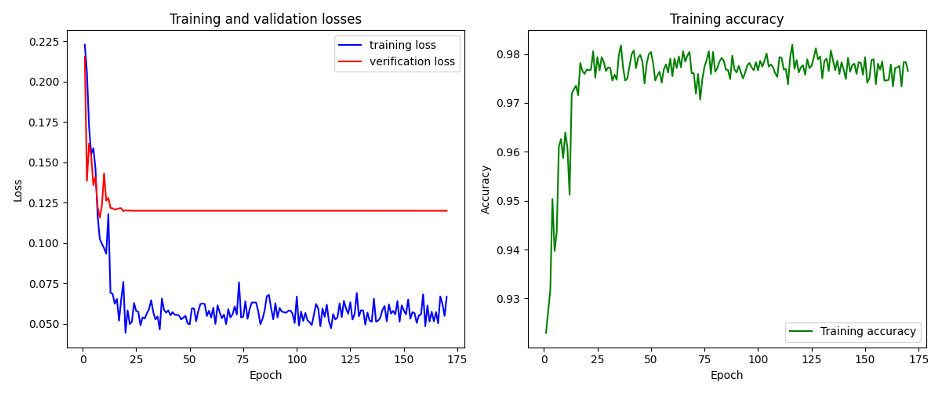



In our training process, we monitored both training and validation accuracy across 170 epochs. While the training accuracy continued to increase, we observed that the validation accuracy peaked at epoch 19. After this point, the validation performance either plateaued or slightly declined, indicating the beginning of overfitting, where the model continues to fit the training data but loses generalization on unseen data.

Choosing the model at epoch 19 allows us to strike a balance between underfitting and overfitting, capturing enough patterns from the training data without memorizing it. This point is often referred to as the early stopping epoch, where the model achieves its best performance on validation data.

Additionally, we plotted the training and validation accuracy/loss curves and found that epoch 19 marked the point with the highest validation accuracy and stable training loss. This empirical evidence supports the decision.

By selecting the weights saved at epoch 19 for testing and further evaluation, we ensure that the model used is both well-trained and generalizable, leading to more reliable performance when applied to the LAT and AAT test sets.

## 4.1.3 AlexNet (Conv_Classifier) Ablation Study




This ablation experiment is to verify the classification ability of AlexNet (baseline model) on fashion projects by changing the number of convolutional layers or classifiers of the AlexNet architecture, and to find potential better model architectures through fine-tuning. Therefore, it mainly consists of the following three parts: model construction, model training, and single experiment process management. Each part is responsible for different stages in the deep learning task, as follows:

### 4.1.3.1 Model Definition

**Function:**
Build an improved AlexNet model with adjustable number of convolutional layers and classifier type.

**Operation path:**

*   Load the base model
*   Select conv layers: According to the parameter conv_layers, cut the specified number of convolutional layers from the original AlexNet.
*   Build a feature extraction module: Combine the cut convolutional layers into the feature extractor self.features in sequence.
*   Adaptive pooling
*   Calculate the unfolded size
*   Define the classifier module:  

    *If classifier_type='softmax', use a two-layer fully connected network and and ReLU activation.*

    *If classifier_type='svm', use a single-layer linear classifier.*
*   Forward Pass


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class ModifiedAlexNet(nn.Module):
    def __init__(self, conv_layers=3, num_classes=4, classifier_type='softmax'):
        super(ModifiedAlexNet, self).__init__()

        # Load base AlexNet
        base_model = models.alexnet(weights=None)

        layers = []     # List to store selected layers
        conv_count = 0  # Counter for the number of convolutional layers

        for layer in base_model.features:
            if isinstance(layer, nn.Conv2d):   # Check if the layer is a convolutional layer
                conv_count += 1
            layers.append(layer)               # Add the layer to the list
            if conv_count >= conv_layers:       # Stop once the desired number of conv layers is reached
                break

        self.features = nn.Sequential(*layers)  # Define the feature extractor
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))  # Adaptive pooling to fixed size (6x6)

        # Automatically calculate the flattened feature size
        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, 224, 224)
            dummy_output = self.avgpool(self.features(dummy_input))
            flatten_size = dummy_output.view(1, -1).shape[1]    # Compute flattened feature size

        # Define the classifier based on the specified type
        if classifier_type == 'softmax':
            self.classifier = nn.Sequential(
                nn.Linear(flatten_size, 4096),          # FC layer 1
                nn.ReLU(inplace=True),                  # ReLU
                nn.Dropout(),                            # Dropout
                nn.Linear(4096, num_classes)             # FC layer 2 (output layer)
            )
        elif classifier_type == 'svm':
            self.classifier = nn.Linear(flatten_size, num_classes)  # Linear layer for SVM

    def forward(self, x):
        x = self.features(x)              # Feature extraction
        x = self.avgpool(x)                # Adaptive pooling
        x = torch.flatten(x, 1)            # Flatten feature maps
        x = self.classifier(x)             # Classification
        return x

### 4.1.3.2 Model Definition

**Function:**
Optimize model parameters on the training set so that it learns the classification features in the data.

**Operation path:**

*   Define loss function: CrossEntropyLoss
*   Define optimizer: SGD
*   Training round by Epoch:  

    *Forward propagation*

    *Calculate loss*

    *Backward propagation, update gradients*

    *Optimizer updates parameters*

*   Return the trained model


In [ ]:
import torch.optim as optim

def train(model, train_loader, num_epochs=19):

    model.to(device)
    criterion = nn.CrossEntropyLoss()                    # Define loss function (Cross-Entropy Loss)
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # SGD optimizer with momentum

    for epoch in range(num_epochs):
        model.train()                                    # Set model to training mode
        total_loss, total_correct = 0.0, 0               # Initialize loss and accuracy counters

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()                        # Zero the parameter gradients
            outputs = model(inputs)                      # Forward pass
            loss = criterion(outputs, labels)            # Compute loss
            loss.backward()                              # Backward pass
            optimizer.step()                             # Update parameters

            total_loss += loss.item() * inputs.size(0)    # Accumulate batch loss
            total_correct += torch.sum(outputs.argmax(1) == labels.data)  # Count correct predictions

        # Print training statistics after each epoch
        print(f"Epoch {epoch+1}/{num_epochs}: Loss={total_loss/len(train_loader.dataset):.4f} Acc={total_correct.double()/len(train_loader.dataset):.4f}")

    return model

### 4.1.3.3 Single Experiment Management

**Function:**
Uniformly perform a complete model initialization, training, and evaluation, and record the experimental results.

**Operation path:**

*   Model construction
*   Model training
*   Model evaluation:  

    *Call evaluate() to get the true label and predicted label on the test set*

    *Call compute_metrics() to calculate evaluation indicators such as accuracy, precision, and recall*

    *Draw the confusion matrix*

*   Result display: classification report



In [ ]:
# Run Model
# Run a single training and evaluation experiment.
def run_single_experiment(name, conv_layers, classifier_type): #Name of the experiment, number of conv layers, type of classifier

    print(f"Training: {name}")

    model = ModifiedAlexNet(conv_layers=conv_layers, classifier_type=classifier_type)  # Initialize model
    model = train(model, train_loader)  # Train the model

    y_true, y_pred = evaluate(model, test_loader)  # Predict on the test set

    metrics, cm, report = compute_metrics(y_true, y_pred)  # Compute evaluation metrics

    plot_confusion(cm, list(CLASS_MAP.keys()), f"Confusion Matrix for {name}")  # Plot confusion matrix

    print(f"Classification Report for {name}:")  # Print classification report
    print(pd.DataFrame(report).T)

    return metrics  #  Return the evaluation metrics(e.g., accuracy, precision, recall)

### 4.1.3.4 Single Experiment Management

**Function:**
Run the experimental groups one by one.

**Experimental Design:**
Specifically, referring to the study of Eldem et al. (2023 [link text](https://doi.org/10.1016/j.jestch.2023.101490)), a series of ablation experiments were designed. There were 7 groups in total, and the number of convolutional layers (3 layers, 4 layers, 6 layers) and the type of classifier (Softmax and SVM) were adjusted respectively. Among them, Study 1 adopted the standard AlexNet structure, including 5 convolutional layers and Softmax classifier; Study 2 to Study 7 made systematic changes in the depth of the convolutional layer and the final classification module to examine the impact of different structural combinations on classification performance. By comparing the classification effects of each model, this study aims to analyze the specific mechanism of the number of convolutional layers and classifier selection on the accuracy of fashion product image recognition.


| Study | Model         | Convolutional layer | Classifier |
|-------|---------------|---------------------|------------|
| 1     | AlexNet       | 5                   | Softmax    |
| 2     | 3Conv_Softmax | 3                   | Softmax    |
| 3     | 3Conv_SVM     | 3                   | SVM        |
| 4     | 4Conv_Softmax | 4                   | Softmax    |
| 5     | 4Conv_SVM     | 4                   | SVM        |
| 6     | 6Conv_Softmax | 6                   | Softmax    |
| 7     | 6Conv_SVM     | 6                   | SVM        |

In [ ]:
run_single_experiment("AlexNet", 5, "softmax")

In [ ]:
run_single_experiment("3Conv_Softmax", 3, "softmax")

In [ ]:
run_single_experiment("3Conv_SVM", 3, "svm")

In [ ]:
run_single_experiment("4Conv_Softmax", 4, "softmax")

In [ ]:
run_single_experiment("4Conv_SVM", 4, "svm")

In [ ]:
run_single_experiment("6Conv_Softmax", 6, "softmax")

In [ ]:
run_single_experiment("6Conv_SVM", 6, "svm")

# **4.2 AlexNet + CBAM（Convolutional Block Attention Module）**

## 4.2.1Background and motivation

This section details the proposed modified AlexNet architectures for classification.

It is a CNN architecture developed by the original AlexNet architecture. AlexNet with 8 layers depth is the winner of ILSVRC 2012 competition.

The first 5 layers are convolutional and the last 3 layers are fully con-nected. There are also activation and pooling layers among the layers. It has an important place among CNN models.

In this improved methodology, we adds a Channel Attention Module and a Spatial Attention Module to the Alexnet model to realise the model's performance on the Accessories low recognition accuracy optimisation.

**The standard AlexNet performed significantly low on the recognition of the Accessories category after the training was completed**, although the overall accuracy was acceptable.

**The reasons for this problem include:**

1.  The image features of Accessories category are more granular and varied, andthere is no uniform commonality to facilitate learning;
2.  The shallow structure of the AlexNet network, which has a natural disadvantage in spatial modelling ability and detail capturing;
3.  The convolutional layer is distracted from key regions, making it difficult to focus on discriminative regions (e.g., buttons, bracelets, etc.).





## 4.2.2 Reasons for choosing CBAM (Convolutional Block Attention Module)
CBAM (2018) was first presented in the paper《CBAM: Convolutional Block Attention Module》 By Sanghyun Woo et al., ECCV 2018.

**CBAM is a lightweight, general-purpose attention module that can be seamlessly inserted into existing CNNs to improve the discriminative and expressive power of features.**

*   Simplicity and efficiency: CBAM has a simple structure, CBAM is smaller,stable in training, strong in generalisation, and suitable for shallow networks like Alexnet.
*   Suitable for fine-grained classification: especially for fine-grained clothing tasks (necklaces, earrings, etc.).


## 4.2.3 CBAM Module Principle and Architecture

###CBAM includes two parts of the attention mechanism:

*   The Channel Attention Module makes the model pay more attention to which channel's information is more important.

*   The Spatial Attention module allows the model to pay more attention to which regions in the image are more important.

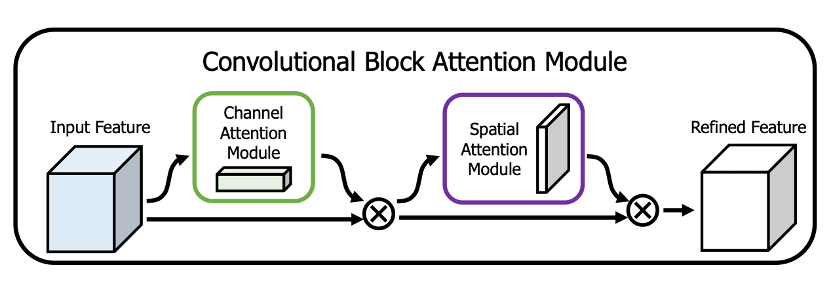

Fig.1. CBAM Architecture[1]

Given an intermediate feature map $F \in \mathbb{R}^{C \times H \times W}$,CBAM Generated sequentially:

$$
F' = M_c(F) \otimes F, \quad F'' = M_s(F') \otimes F'
$$

where $\otimes$ denotes element-by-element multiplication, $M_c$ is the channel attention map, and $M_s$ is the spatial attention map.

During multiplication, the atten-
tion values are broadcasted (copied) accordingly: channel attention values are broadcasted along the spatial dimension, and vice versa. F‘’ is the final refined output. It depicts the computation process of each attention map.
The following describes the details of each attention module.

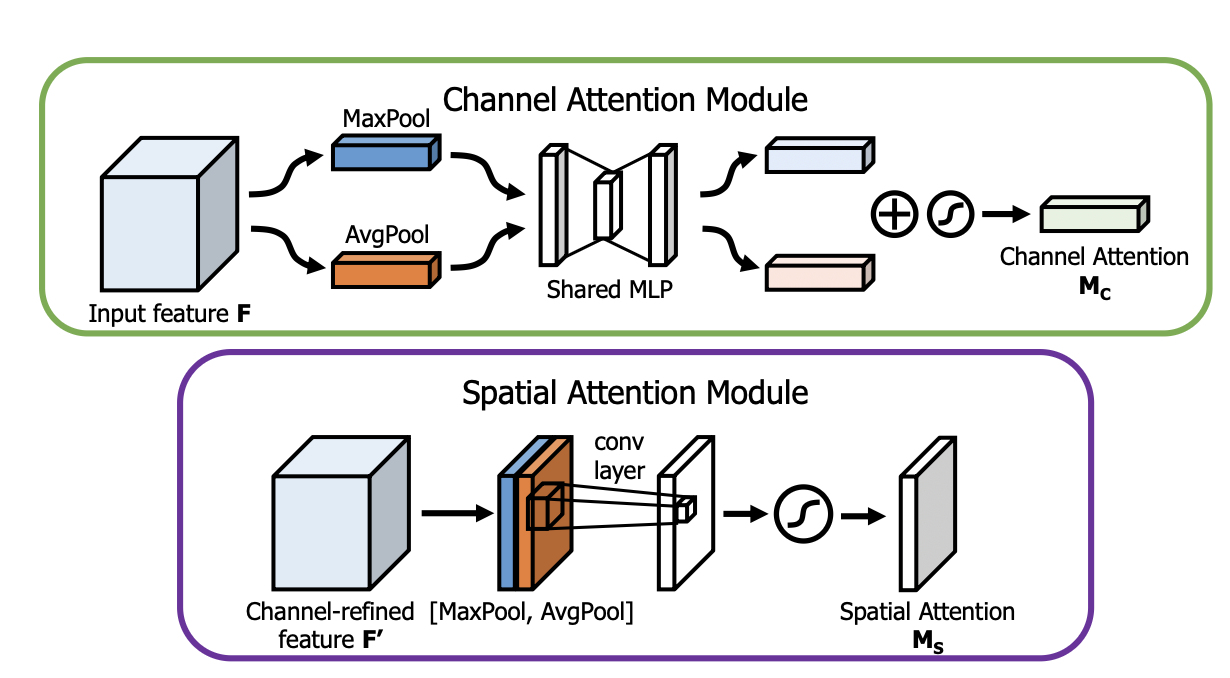

Fig.2. Channel Attention + Spatial Attention[1]

###1. Channel Attention Module

Global Pooling of the input feature map F is used separately:

- Average Pooling: captures overall features
- Maximum Pooling: to highlight salient regions

- Two description vectors are obtained (both C $\times$ 1 $\times$ 1):

  $F_{avg}^c = AvgPool(F),\quad F_{max}^c = MaxPool(F)$

- Feed the two pooled vectors into the shared MLP (two-layer FC):

  $M_c(F) = \sigma(\text{MLP}(F_{avg}^c) + \text{MLP}(F_{max}^c))$

- The final channel attention weights are multiplied with the original features.

###2. Spatial Attention Module

The input is F'.

Maximum pooling and average pooling on the channel dimension yields two 1 $\times$ H $\times$ W feature maps.

$F_{avg}^s = AvgPool_{channel}(F'),\quad F_{max}^s = MaxPool_{channel}(F')$

Splice these two feature maps:$[F_{avg}^s; F_{max}^s]$, feed into a 7×7 convolutional layer:
$M_s(F') = \sigma(\text{Conv7×7}([F_{avg}^s; F_{max}^s]))$

Multiply with F′ to get the final output F″.

## 4.2.4  CBAM module code structure

###1) Channel Attention Module

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=8):       # in_planes: number of channels in the input feature map (C)；ratio: channel compression ratio, determines the width of intermediate layer (default 16);
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)   # Average pooling is done for each channel, and the output shape is [B, C, 1, 1].
        self.max_pool = nn.AdaptiveMaxPool2d(1)   # Maximum pooling
        self.fc = nn.Sequential(                  # This is a two-layer ‘fully-connected’ convolution (MLP), which is used to learn the weights between channels.
            nn.Conv2d(in_planes, in_planes // ratio, 1, bias=False),    # Layer 1: Dimensionality reduction (reduce parameters to improve generalisation);
            nn.ReLU(),
            nn.Conv2d(in_planes // ratio, in_planes, 1, bias=False)     # Layer 2: restoration of original dimensions;
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))  # channel attention weights after Average Pooling
        max_out = self.fc(self.max_pool(x))  # channel attention weights after Maximum pooling

        # Summation is better than splicing or other methods because it avoids introducing extra parameters and is more stable.
        out = avg_out + max_out   # The two channel attentions are weighted and normalised to obtain the final attention mask
        return self.sigmoid(out)

 x input feature map with shape [B, C, H, W]:

- B: batch size
- C: number of channels
- H, W: space height and width

self.avg_pool(x): do global average pooling on input feature map x, output dimension becomes [B, C, 1, 1].

self.fc(): input [B, C, 1, 1] into 2-layer MLP (1×1 Conv implementation), output is still [B, C, 1, 1].

**Equivalent to generating an attentional weight value for each channel**

Global max pooling of input feature map x, also in [B, C, 1, 1] dimensions.

### 2) Spatial Attention Module

In [ ]:
class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv1 = nn.Conv2d(2, 1, kernel_size=kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)  # Calculation of the average and maximum value of the channel for each position, shape [B, 1, H, W]
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)      # Splice and input to convolution, output spatial attention of [B, 2, H, W]
        x = self.conv1(x)                             # conv1 is used to extract spatial relations (attention distributions) with output dimensions [B, 1, H, W]
        return self.sigmoid(x)

The number of input channels is 2:
- One from AvgPool
- One from MaxPool
- The output channel is 1, which means that a single-channel spatial attention map ([B, 1, H, W]) is generated.
- bias=False is to simplify the attention computation.

For each position (h, w), compute the maximum of all channels, highlighting the most locally significant activation positions.


##4.2.5 AlexNet + CBAM

This section details the proposed modified AlexNet architectures for classification of fashion item. In this study, we add CBAM attention modules to Conv3-5. The structure of method is shown in Fig. 3.


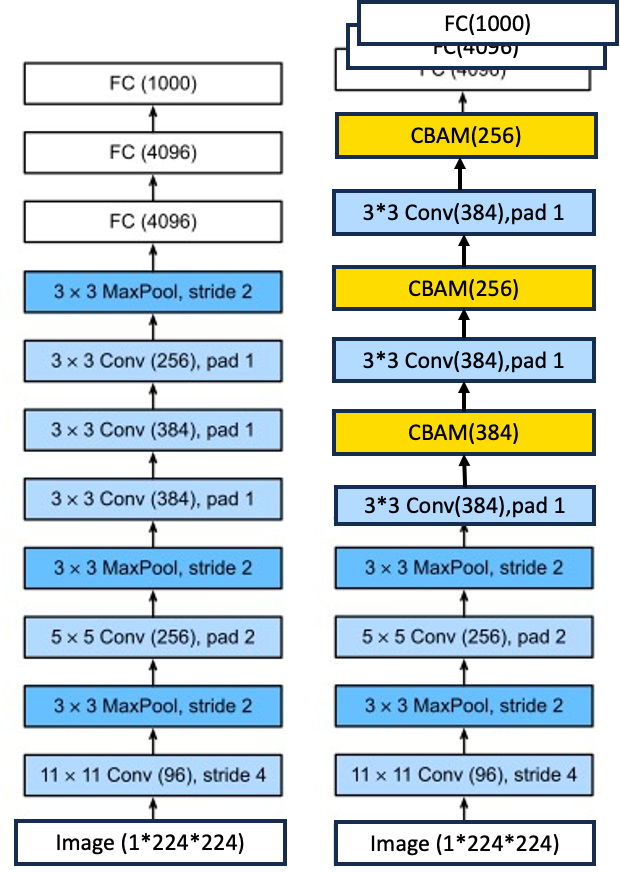

Fig.3. Alexnet+CBAMArchitecture

Based on the analyses of the reference paper[1], I chose to add attention modules to Conv3-5, which can effectively focus on meaningful image regions.

### 4.2.5.1 AlexNet+CBAM Code Structure

####1）Replace the first layer with a greyscale map

In [ ]:
class AlexNetCBAM(nn.Module):
    def __init__(self, num_classes=4, input_channels=1, load_pretrained=True):
        super().__init__()
        base = alexnet(pretrained=load_pretrained)

        # Replace the first layer with a greyscale map
        old_conv = base.features[0]                           # Extract the first convolutional layer
        new_conv = nn.Conv2d(input_channels, 64, kernel_size=11, stride=4, padding=2)  # Constructing a new first convolution

        # If the input is a greyscale map (1-channel) and the pre-training is a colour map (3-channel)
        # The original 3-channel convolutional weights are averaged and copied to 1-channel to be compatible with the pre-training weights.
        if load_pretrained and input_channels == 1:
            with torch.no_grad():
                new_conv.weight.copy_(old_conv.weight.mean(dim=1, keepdim=True)) # Average the three RGB channels
                new_conv.bias.copy_(old_conv.bias)
        base.features[0] = new_conv

####2）Self.features: feature extraction part

Based on the first five convolutional modules (conv1-conv5) of AlexNet, CBAM is added after conv3~conv5.


In [ ]:
self.features = nn.Sequential(
            base.features[0], base.features[1], base.features[2],           # conv1
            base.features[3], base.features[4], base.features[5],           # conv2
            base.features[6], base.features[7], CBAM(384),                  # conv3 + CBAM
            base.features[8], base.features[9], CBAM(256),                  # conv4 + CBAM
            base.features[10], CBAM(256),                                   # conv5 + CBAM
        )

| Layer Index | Modules | Functional Description                                              |
|------------|--------------------|-------------------------------------------------------|
| 0–2        | conv1 + ReLU + LRN | Convolution extraction + Activation + local response normalisation                     |
| 3–5        | conv2 + ReLU + LRN | Second convolution + Activation + local response normalisation                   |
| 6–7        | conv3 + ReLU       | Third convolution + Activation                                     |
| CBAM(384)  |Attention Mechanism         | Introduce channel and spatial attention (input channel is 384)               |
| 8–9        | conv4 + ReLU       | Fourth layer convolution + activation                                     |
| CBAM(256)  | Attention Mechanism       | Layer 4 output channel is 256, CBAM handles its attention               |
| 10         | conv5              |  Fifth layer convolution                                            |
| CBAM(256)  | Attention Mechanism         | Channel + Spatial Attention on conv5 output                     |

####3）Adaptive Mean Pooling Layer + Fully connected classifier part

Resize the input feature map of any size to a fixed (6,6).

In [ ]:
self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),                   # Dropout Prevent overfitting
            nn.Linear(256 * 6 * 6, 4096),   # first layer, fully connected (input is flatten of output above)
            nn.ReLU(inplace=True),          # activation function
            nn.Dropout(),                   # Dropout again
            nn.Linear(4096, 4096),          # second fully connected layer
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),   # Output layer, num_classes adjusted to task
        )

####4）forward propagation function

In [ ]:
def forward(self, x):
        x = self.features(x)        # feature extraction
        x = self.avgpool(x)         # Pooling
        x = torch.flatten(x, 1)     # flatten to (batch, 9216)
        x = self.classifier(x)      # Classifier
        return x

####5）Importing AlexNet variants with CBAM modules

In [ ]:
from torchvision.models import alexnet                                      # Importing the official pre-trained AlexNet model structure from torchvision

# Instantiate your custom AlexNet+CBAM model
model = AlexNetCBAM(num_classes=4, input_channels=1, load_pretrained=False) # 4 types of image classification tasks #Input is a greyscale image (single channel)
load_partial_weights(model, alexnet(pretrained=True))                       # Call load_partial_weights() function to load the weights from the official model into your custom model.
model = model.to(device)

Three new models were proposed, by adjusting different parameters.

Alex-CBAM(16&7)
*   Ratio:16
*   Kernel Size:7

Alex-CBAM(8&7)
*   Ratio:8
*   Kernel Size:7

Alex-CBAM(8&5)
*   Ratio:8
*   Kernel Size:5

####1. Channel compression ratio
**It affects the capacity and computational efficiency of the model：**
*   If the ratio is larger, the number of channels(hidden layer) is small, and the computational burden is reduced, but the expressive capacity of attention is reduced.
*   If the ratio is smaller, the hidden layer is wider, the model is more capable of learning the channel weights, but the computational overhead increases.

####2. Spatial Attention Convolution Kernel Size
**The size of the Kernel directly determines the size of the spatial region perceived by the convolution:**
*   If the value is 3 or 5 , the attention mechanism can only focus on a small local area, which is suitable for fine-grained feature extraction.
*   If the value is 7 or 11, it can focus on a larger range of information.



#**4.3 ResNet18 + CBAM**

## 1. Baseline: ResNet18


The baseline model uses the pretrained ResNet18 architecture with all convolutional layers frozen. Only the final fully connected (FC) layer is fine-tuned for our 4-class fashion classification task.

- Backbone: ResNet18 pretrained on ImageNet  
- Trainable parameters: Final FC layer only  
- Loss function: Weighted CrossEntropyLoss  
- Augmentations: Resize, Flip, Rotation, ColorJitter  

This baseline model uses pretrained ResNet18 from ImageNet. All convolutional layers are frozen, and only the final fully connected layer is trained for our 4-class task.

In [ ]:
from torchvision import models
import torch.nn as nn

class BaselineResNet18(nn.Module):
    def __init__(self, num_classes=4):
        super(BaselineResNet18, self).__init__()
        self.model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        for param in self.model.parameters():
            param.requires_grad = False  # Freeze backbone
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

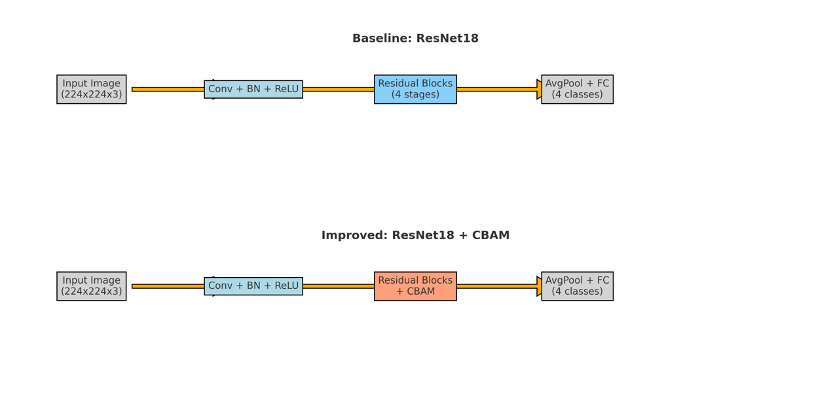

## 2. Improved: ResNet18 + CBAM


CBAM (Convolutional Block Attention Module) enhances ResNet18 by introducing both **Channel Attention** and **Spatial Attention** within each residual block. This allows the network to better focus on "what" and "where" to pay attention to in the feature maps.

- Attention Type: Channel + Spatial  
- Location: CBAM added after each residual block  
- Training: All layers are trainable  
- Outcome: Better accuracy, especially on minority classes

The channel attention module extracts channel information using global average pooling and maximum pooling, and then controls the importance of each channel by generating weights through a shared MLP network.

In [ ]:
class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.shared_mlp = nn.Sequential(
            nn.Conv2d(in_planes, in_planes // ratio, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_planes // ratio, in_planes, 1, bias=False)
        )

    def forward(self, x):
        avg_out = self.shared_mlp(self.avg_pool(x))
        max_out = self.shared_mlp(self.max_pool(x))
        return torch.sigmoid(avg_out + max_out)

Spatial attention directs the network to focus on key regions in the image by splicing the feature map channel dimensions after averaging and maximum pooling, and then obtaining a spatial weight map by convolution.

In [ ]:
class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size // 2, bias=False)

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        return torch.sigmoid(self.conv(x))

We introduce the CBAM module after each residual block of ResNet18 to enable the model to dynamically focus on more important feature channels and spatial locations, thus improving classification performance.

In [ ]:
from torchvision.models import resnet18

class ResNet18_CBAM(nn.Module):
    def __init__(self, num_classes=4):
        super(ResNet18_CBAM, self).__init__()
        base_model = resnet18(weights="IMAGENET1K_V1")
        self.stem = nn.Sequential(
            base_model.conv1,
            base_model.bn1,
            base_model.relu,
            base_model.maxpool
        )
        self.layer1 = self._add_cbam(base_model.layer1)
        self.layer2 = self._add_cbam(base_model.layer2)
        self.layer3 = self._add_cbam(base_model.layer3)
        self.layer4 = self._add_cbam(base_model.layer4)
        self.avgpool = base_model.avgpool
        self.fc = nn.Linear(base_model.fc.in_features, num_classes)

    def _add_cbam(self, layer):
        layers = []
        for block in layer:
            layers.append(block)
            layers.append(CBAM(block.conv2.out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        return self.fc(x)

#**5. Results**

##5.1 The results of AlexNet (Conv_Classifier) Ablation Study


| Study | Model            | Recall | Precision | F1 Score | Specificity |
|-------|------------------|--------|-----------|----------|-------------|
| 1     | AlexNet (baseline)| 0.8222 | 0.8525    | 0.8194   | 0.9309      |
| 2     | 3Conv_Softmax     | 0.8331 | 0.8479    | 0.8238   | 0.9322      |
| 3     | 3Conv_SVM         | 0.8402 | 0.8580    | 0.8384   | 0.9366      |
| 4     | 4Conv_Softmax     | 0.8343 | 0.8546    | 0.8274   | 0.9327      |
| 5     | 4Conv_SVM         | 0.8214 | 0.8570    | 0.8235   | 0.9301      |
| 6     | 6Conv_Softmax     | 0.8295 | 0.8519    | 0.8200   | 0.9308      |
| 7     | 6Conv_SVM         | 0.8513 | 0.8722    | 0.8466   | 0.9393      |

*   When training efficiency is prioritized in real-world applications, 3Conv_SVM provides an excellent balance between performance and computational cost.
*   For scenarios where maximizing test accuracy is the primary objective, 6Conv_SVM stands out as the best-performing model.




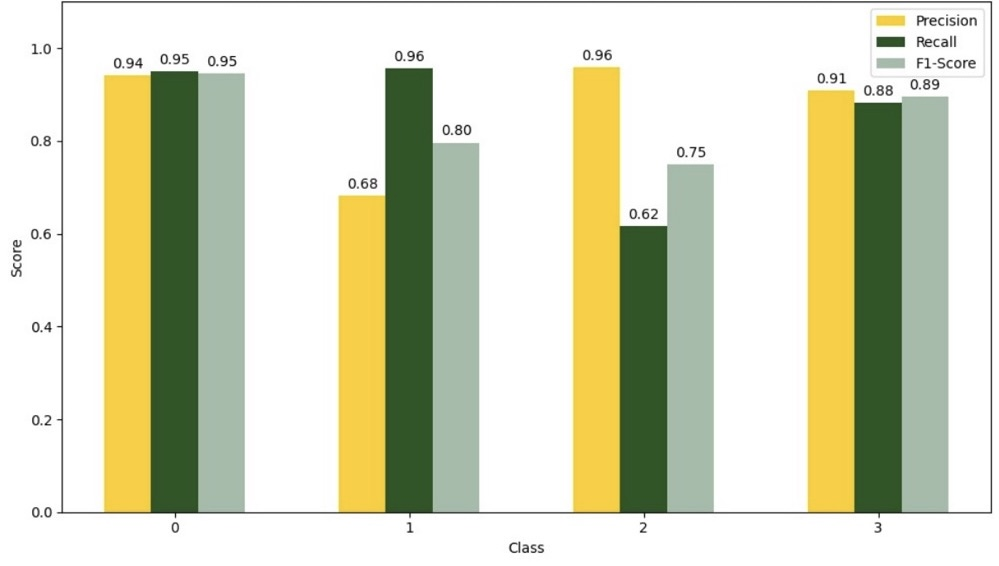

| Class | Category  | Precision | Recall  | F1-Score | Support |
|-------|-----------|-----------|---------|----------|---------|
| 0     | Shoes     | 0.9405    | 0.9508  | 0.9457   | 183     |
| 1     | Clothing  | 0.6816    | 0.9570  | 0.7961   | 302     |
| 2     | Jewelry   | 0.9579    | 0.6156  | 0.7495   | 333     |
| 3     | Bags      | 0.9085    | 0.8817  | 0.8949   | 169     |
|       | **Overall Metrics** |           |         |          |         |
|       | Accuracy  | -         | -       | -        | 82.78%  |
|       | Macro Average | 0.8722 | 0.8513  | 0.8466   | 987     |
|       | Weighted Average | 0.8617 | 0.8278  | 0.8251   | 987     |
|       | Specificity | -         | -       | -        | 0.9393  |

6Conv_SVM achieves the best performance in the shoes and bags categories with high precision and recall. However, the model shows a balance between precision and recall in the clothing and accessories categories, which indicates that there is still potential for further improvement in handling fine-grained categories.

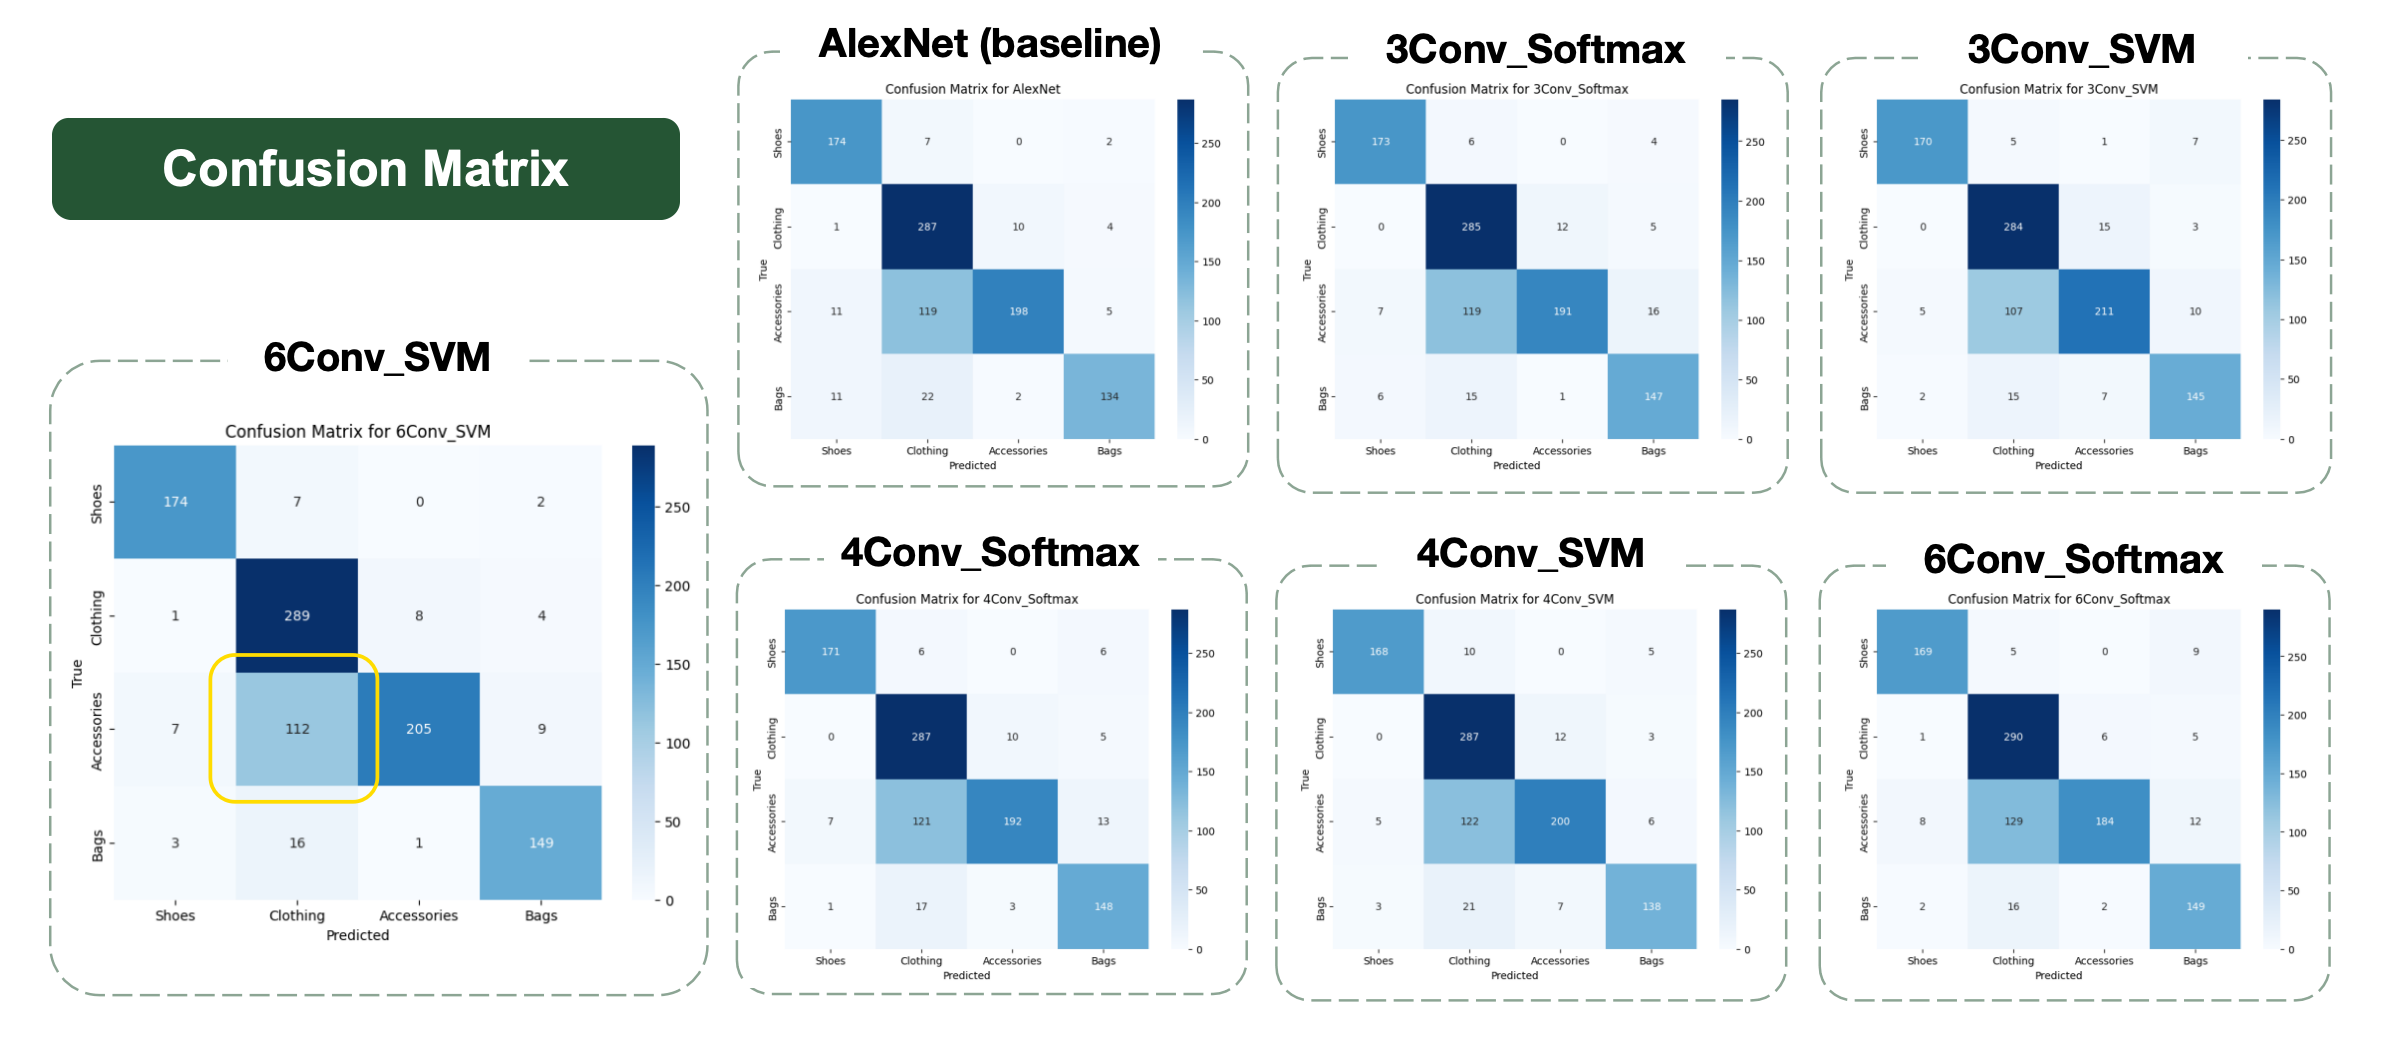

The confusion matrices of the seven experimental groups are shown, which shows that increasing the number of layers can improve the overall accuracy. Due to the diverse forms of accessories, the traditional improved Alexnet performs poorly in accessory classification. The following study 2 continues to solve this problem.

##5.2 The results on the AlexNet+CBAM

|Models      | Recall | Precision | F1 Score   |
|------------|------------|--------------------|-------------------------------------------------------|
|AlexNet(baseline)         |0.8222| 0.8525 | 0.8194
|AlexNet+CBAM(ratio:16, Kernal_size:7)      | 0.8810 | 0.8680                   |0.8720
| AlexNet+CBAM(ratio:8, Kernal_size:7)       | 0.8380       | 0.8350                                     | 0.8360           |
| AlexNet+CBAM(ratio:8, Kernal_size:5) | 0.8420      | 0.8370|0.8380


The results demonstrate that integrating CBAM into AlexNet significantly improves classification performance, especially for the “accessories” category.

Compared to the baseline AlexNet, which achieved an F1 score of 0.8194, the best-performing variant AlexNet+CBAM (ratio=16, kernel_size=7) reaches an F1 score of 0.8720.

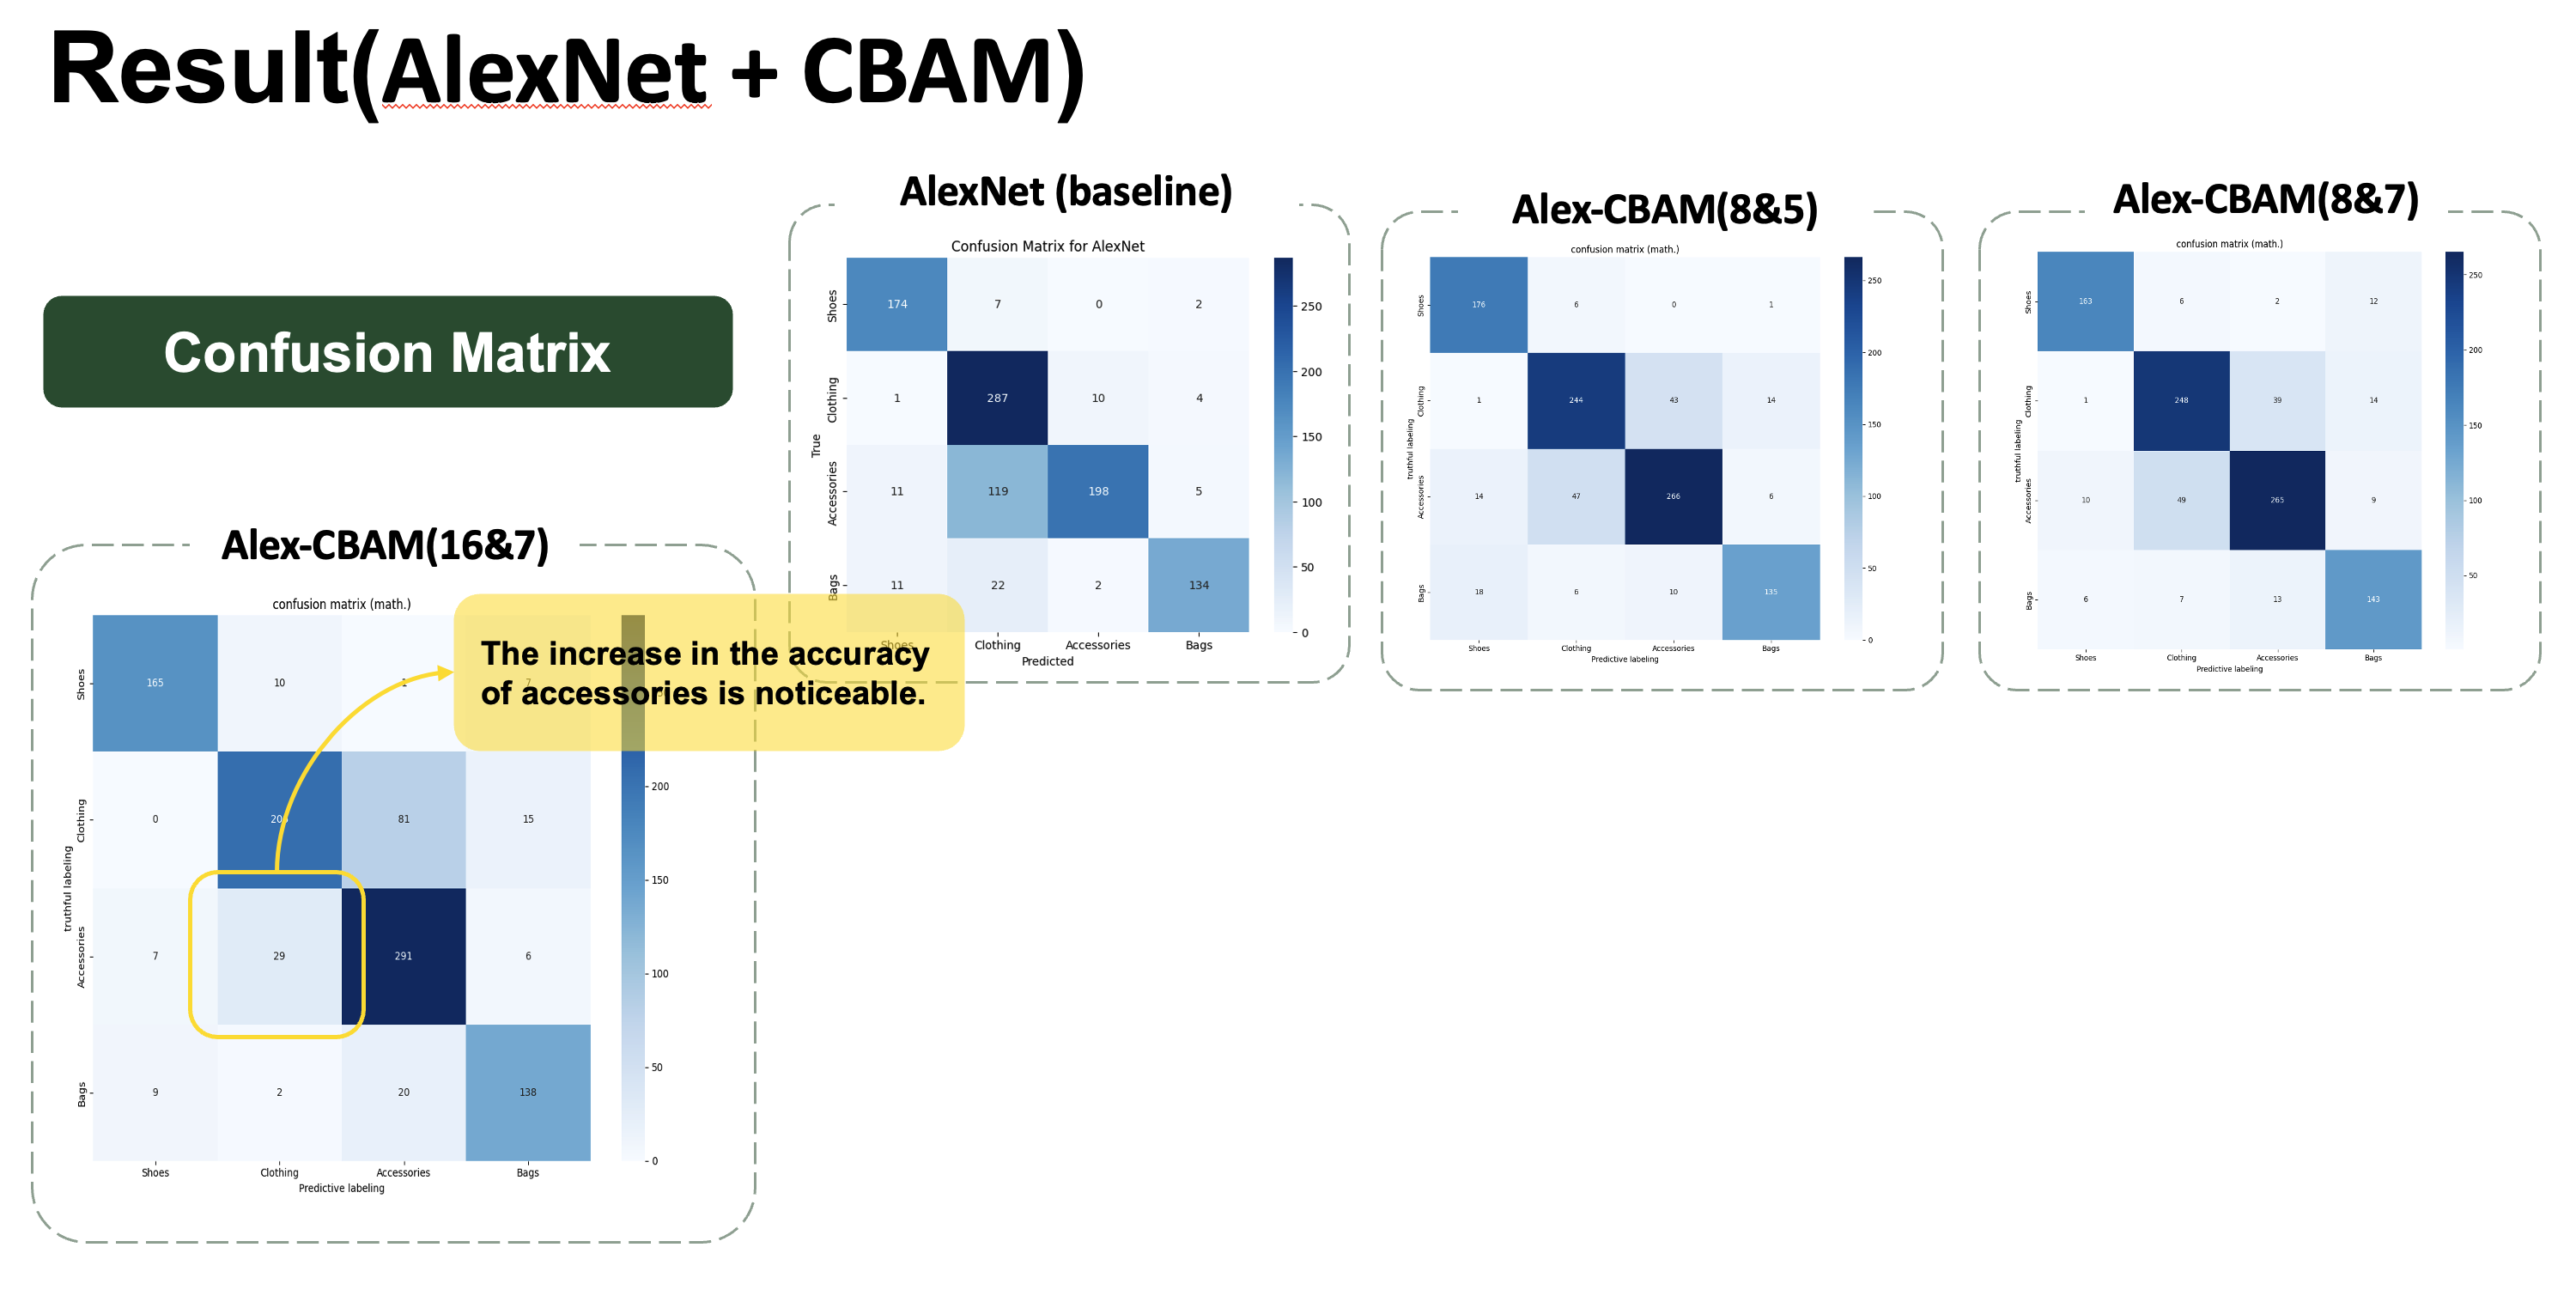

This improvement is further supported by the confusion matrices. In the baseline, “accessories” were often misclassified as “clothing,” but the CBAM-enhanced version reduced such misclassifications significantly.

Specifically, AlexNet+CBAM (16&7) increases the correct predictions for “accessories” from 198 to 291, as highlighted. The recall and precision improvements across all models confirm that attention mechanisms help focus on more relevant spatial and channel features.

However, it also casues the model to reduce accuracy to the Clothing part.

It can be caused by several reasons:

>  1. Limited model capacity and attention bias

*   AlexNet has a shallow structure and a limited number of parameters.
*   The attention mechanism may focus too much on small class features, resulting in the model ‘sacrificing’ the ability to discriminate the main class.

> 2. Too much compensation

*   The original baseline model is biased towards Clothing;
*   After adding attention, the model starts to try to ‘compensate’ for the small categories, which results in too much category bias.



> 3. Inappropriate placement of the attention module

*   If the attention is added too shallowly (e.g., after the first few layers of convolution), the initial feature will be easily disturbed.

## 5.3 The results on the ResNet+CBAM


Below is a comparison of baseline and CBAM-enhanced models on the validation set:

| Metric            | Baseline ResNet18 | ResNet18 + CBAM |
|-------------------|------------------:|----------------:|
| Validation Accuracy | 85%           | **93%**      |
| Best Epoch         | 20                | 20          |
| Parameters Trained | Final FC Layer    | All Layers      |

CBAM improved overall performance and reduced misclassifications on underrepresented categories such as `Bags` and `Accessories`.

----

CBAM helps the model learn both *what features are important* (channel) and *where to focus* (spatial), resulting in stronger generalization and robustness. The trade-off is a slightly higher training time.

Future directions may explore:
- Lightweight attention mechanisms (e.g., SE, ECA)
- Multi-scale or hybrid attention
- Semi-supervised or self-supervised pretraining

#**6. Discussion**

In this project, we implemented and compared three approaches to improve fashion item classification: scaling AlexNet, introducing CBAM, and combining CBAM with ResNet18.

- Our experiments showed that scaling up AlexNet by adding layers and switching classifiers (Softmax vs. SVM) led to some performance improvement. Among these, the 6Conv + SVM variant performed the best. However, this approach still struggled to classify minority categories like accessories, which were often misidentified due to their visual similarity to dominant classes like clothing. This highlights a limitation of basic CNN architectures when dealing with imbalanced or fine-grained data.

- To address this, we introduced the CBAM attention module into AlexNet. This significantly improved recognition of small or detailed items, especially when attention was applied to mid-level layers (Conv3-5). The model became more effective at identifying relevant regions in the input image, which is a clear strength of attention-based designs. However, a weakness we observed is that CBAM sometimes over-focused on local textures, which could cause confusion between patterns and accessories.

- The highest overall performance came from combining CBAM with ResNet18. This setup, leveraging a deeper and pre-trained backbone, achieved excellent generalization and robust classification across all categories, with F1-scores above 0.90 for accessories and bags. It also reduced overfitting and improved the model's stability — another major strength of using deeper architectures. On the downside, such models are computationally expensive and may not be ideal for deployment in real-time or resource-constrained settings.



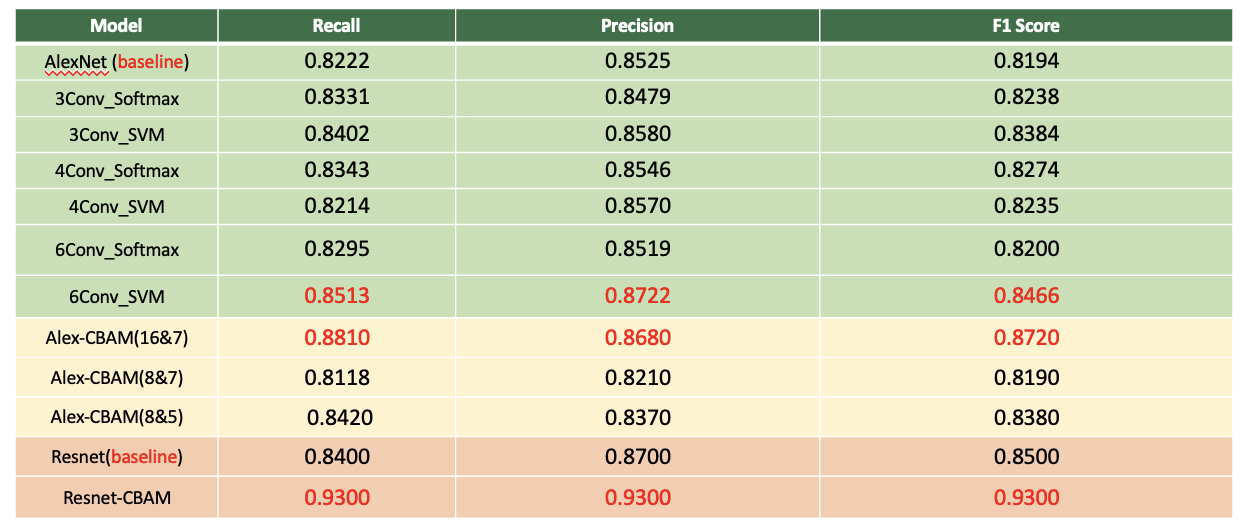

### Future Work


Looking ahead, we plan to explore CNN + Transformer hybrids (e.g., ViT) to improve the model's ability to understand complex clothing styles and global patterns. Additionally, using lightweight or learnable attention modules like SE or ECA could help reduce computational cost without sacrificing too much accuracy.